### アルゴリズム同士の比較グラフを作成するプログラム

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **アルゴリズムで比較をする場合**

設定：ネットワーク・シナリオ・アルゴリズム

In [36]:
# データが格納されているディレクトリ
dir_name = '_sampleData'
net_name = 'Sample'
# シナリオごとの何の値の変化を横軸にするか
comp_name = '# of time_window'
scenarios = ['Scenario_1', 'Scenario_2', 'Scenario_3']
comp_val = [10, 7, 20]
# グラフ化するアルゴリズム｛アルゴリズムの名前: [primal_or_dual, グラフの線の色]｝
algos = {'FISTA_D':['dual', (0, 0, 1)]}

# ------！！！変更するのはこの上まで！！！----------------


# ディレクトリの場所を取得
root = os.path.dirname(os.path.abspath('.'))
root = os.path.join(root, '..', dir_name, net_name)

# グラフを作成するために必要なデータが揃っているかを確認
# (実行時にoutputが無ければOK)
files = os.listdir(root)
for scene in scenarios:
    if scene not in files:
        print('Scenario: ', scene, 'is not existed!')
    else:
        for algo in algos:
            if algo not in os.listdir(os.path.join(root, scene, 'result')):
                print('Dir: dirname//netname//scene//result//algo is not existed'.replace('dirname',dir_name).replace('netname', net_name).replace('scene', scene).replace('algo', algo))
            elif 'result.csv' not in os.listdir(os.path.join(root, scene, 'result', algo)):
                print('File: dirname//netname//scene//result//algo//result.csv is not existed'.replace('dirname',
                    dir_name).replace('netname', net_name).replace('scene', scene).replace('algo', algo))

# 比較変数を辞書として登録
comp_val = dict(zip(scenarios, comp_val))
comp_val = dict(sorted(comp_val.items(), key=lambda x: x[1]))
scenarios = list(comp_val.keys())
# print(comp_val)


In [37]:
# データの読み込み
data = {}
for algo in algos.keys():
    data[algo] = {}
    for scene in scenarios:
        data[algo][scene] = pd.read_csv(os.path.join(root, scene, 'result', algo, 'result.csv'))
        # 目的関数の相対誤差を追加
        obj = np.array(list(data[algo][scene]['now_obj']))
        obj_error = obj - obj[-1]
        if algos[algo][0] == 'dual':
            obj = -obj
        sol_obj = obj[-1]
        data[algo][scene]['obj_error'] = obj_error
        # print(data[scene]['now_obj'])

横軸：comp_val，縦軸：data の columns から読み取る（最後の要素）

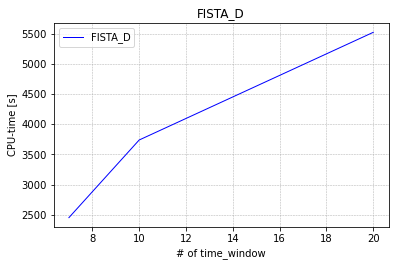

In [39]:
# 縦軸を何にするか
# [Iteration, para_time, total_time, now_conv, now_lips, num_call_obj, num_call_nbl, num_call_proj, num_call_conv, obj_error]
tateziku = 'total_time'
tate_name = 'CPU-time [s]'


# ここから下はグラフ化
# ---------------------------------------------------------------------------------------------------------------------------------------

fig = plt.figure(figsize=(6, 3.75))
ax1 = fig.add_subplot(111)
# ax1.set_ylim(0.0005, 10000)

# 対数にする？
# ax1.set_yscale('log')
ax1.set_title(algo)

ax1.set_xlabel(comp_name)
ax1.set_ylabel(tate_name)

ax1.grid(axis='y', lw=0.5, ls='--')
ax1.grid(axis='x', lw=0.5, ls='--')

tate_val = []

for algo in algos:
    for scene in scenarios:
        tate_val.append(list(data[algo][scene][tateziku])[-1])
    ax1.plot(list(comp_val.values()), tate_val, label=algo, lw=1.0, c=algos[algo][1])


ax1.legend()
plt.show()
